In [2]:
import numpy as np
from scipy import signal
import random

import matplotlib.pyplot as plt
from matplotlib import image
%matplotlib inline

![s](https://ars.els-cdn.com/content/image/1-s2.0-S1361841520302565-gr5_lrg.jpg)

[Paper](https://www.sciencedirect.com/science/article/pii/S1361841520302565?casa_token=ndpdyXziblkAAAAA:NBcH_rGKkdDa7bRv4yLkS7QCCFnAl5UhxhrG8jvucxx-tJJF0EnAegWfkkezscNMfGKSwK2Fyg)

### Gaussian Kernel

In [3]:
def gaussian_kernel(kernlen=5, std=1):
    """Returns a 2D Gaussian kernel array."""
    gkern1d = signal.gaussian(kernlen, std=std).reshape(kernlen, 1)
    gkern2d = np.outer(gkern1d, gkern1d)
    return gkern2d

### Numpy Convolution

In [4]:
def convolution2d(image, kernel, bias):
    """Basic Numpy Convolution"""
    m, n = kernel.shape
    if (m == n):
        y, x = image.shape
        y = y - m + 1
        x = x - m + 1
        new_image = np.zeros((y,x))
        for i in range(y):
            for j in range(x):
                new_image[i][j] = np.sum(image[i:i+m, j:j+m]*kernel) + bias
    return new_image

In [5]:
def create_mask(h, w, count=10):
    """Basic Random Marked Mask"""
    maskq = np.zeros([w,h])
    lst_points = [(random.randrange(0,h,5), random.randrange(0,h,5)) for _ in range(count)]

    for p in lst_points:
        maskq[p[0]][p[1]] = 255
        
    return maskq

### Random Mask Image

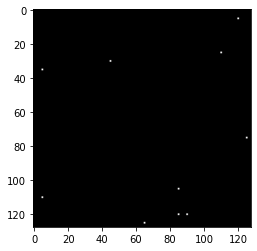

In [6]:
z = create_mask(128,128)
img_mask = plt.imshow(z,cmap="gray")
plt.show()

### Image After Gaussian Kernel Operation

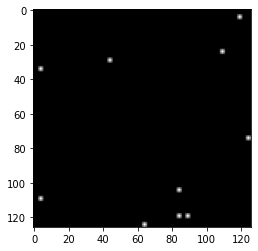

In [7]:
img_conv = convolution2d(z, gaussian_kernel(3, std=1), bias = 0.001)
plt.imshow(img_conv, cmap="gray")

Example Paper: 
